In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jul  7 09:07:28 2023

@author: swank
"""

'\nCreated on Fri Jul  7 09:07:28 2023\n\n@author: swank\n'

In [2]:
### Instruction:
'''Income Qualification
Course-end Project 2

DESCRIPTION

Identify the level of income qualification needed for the families in Latin America.

Problem Statement Scenario:
Many social programs have a hard time ensuring that the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of the population can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to
classify them and predict their level of need.

While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

The Inter-American Development Bank (IDB)believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.
Following actions should be performed:

Identify the output variable.
Understand the type of data.
Check if there are any biases in your dataset.
Check whether all members of the house have the same poverty level.
Check if there is a house without a family head.
Set poverty level of the members and the head of the house within a family.
Count how many null values are existing in columns.
Remove null value rows of the target variable.
Predict the accuracy using random forest classifier.
Check the accuracy using random forest with cross validation.'''

'Income Qualification\nCourse-end Project 2\n\nDESCRIPTION\n\nIdentify the level of income qualification needed for the families in Latin America.\n\nProblem Statement Scenario:\nMany social programs have a hard time ensuring that the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of the population can’t provide the necessary income and expense records to prove that they qualify.\n\nIn Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to\nclassify them and predict their level of need.\n\nWhile this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.\n\nThe Inter-American Development Bank (IDB)believes that new methods beyond tradition

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
sns.set()

In [4]:
train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")

In [5]:
train_dataset.head()
test_dataset.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [6]:
#so far only displays test
#train zero-index ID ends with '684

#cleaning up the data
train_dataset.info(143)
#core info by frequency
train_dataset.info()
# drops full range of columns and their datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 143 columns):
 #    Column           Dtype  
---   ------           -----  
 0    Id               object 
 1    v2a1             float64
 2    hacdor           int64  
 3    rooms            int64  
 4    hacapo           int64  
 5    v14a             int64  
 6    refrig           int64  
 7    v18q             int64  
 8    v18q1            float64
 9    r4h1             int64  
 10   r4h2             int64  
 11   r4h3             int64  
 12   r4m1             int64  
 13   r4m2             int64  
 14   r4m3             int64  
 15   r4t1             int64  
 16   r4t2             int64  
 17   r4t3             int64  
 18   tamhog           int64  
 19   tamviv           int64  
 20   escolari         int64  
 21   rez_esc          float64
 22   hhsize           int64  
 23   paredblolad      int64  
 24   paredzocalo      int64  
 25   paredpreb        int64  
 26   pareddes         i

In [7]:
#is_null
train_dataset.isna().sum()/len(train_dataset)*100
train_dataset.isna().sum()  #prints sum of nulls
#don't need to do this
#(prints top)
train_dataset.drop('Id',axis=1)
train_dataset.drop('v2a1',axis=1)

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,0,3,0,1,1,0,NaN,0,1,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,0,4,0,1,1,1,1.0,0,1,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,0,8,0,1,1,0,NaN,0,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,0,5,0,1,1,1,1.0,0,2,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,0,5,0,1,1,1,1.0,0,2,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,0,6,0,1,1,0,NaN,0,2,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,ID_c94744e07,0,6,0,1,1,0,NaN,0,2,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,ID_85fc658f8,0,6,0,1,1,0,NaN,0,2,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,ID_ced540c61,0,6,0,1,1,0,NaN,0,2,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


In [8]:
#lambda for column nul
'''I can't write this lambda'''
#train_dataset.isna().any()[lambda x: x]
### look into changing the data type

"I can't write this lambda"

In [9]:
train_dataset['v18q1'].isna().sum()
#train_dataset['v2a1'].isna().sum()

7342

In [10]:
#bottomprint
"""This just doesn't seem necessary to me"""
#train_dataset.tail(10)

"This just doesn't seem necessary to me"

In [11]:
"""This will first drop the `v18q1` column from `train_dataset`. Then,
 it calculates the percentage of missing values in the `rez_esc` column
 using the `isna()` method to get a boolean mask of the NaN values,
 `sum()` method to get the number of missing values,
 and dividing it by the total length of `train_dataset`. 
Finally, it prints the percentage of missing values in the console."""

'This will first drop the `v18q1` column from `train_dataset`. Then,\n it calculates the percentage of missing values in the `rez_esc` column\n using the `isna()` method to get a boolean mask of the NaN values,\n `sum()` method to get the number of missing values,\n and dividing it by the total length of `train_dataset`. \nFinally, it prints the percentage of missing values in the console.'

In [12]:
train_dataset.drop('v18q1',axis=1,inplace=True)
train_dataset['rez_esc'].isna().sum()/len(train_dataset)*100


train_dataset.drop('rez_esc',axis=1,inplace=True)
train_dataset['meaneduc'].isna().sum()  #taking sample last names

5

<Axes: xlabel='meaneduc', ylabel='Density'>

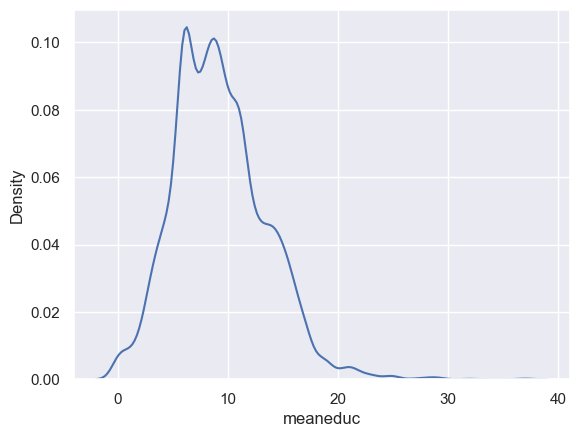

In [13]:
### I DONT NEED THIS DATA TYPE
train_dataset['meaneduc'].dtype

#seaborn plot
sns.kdeplot(train_dataset['meaneduc'])
#kdeplot.show()
### had to run this cell twice in Spyder, possible bad reference

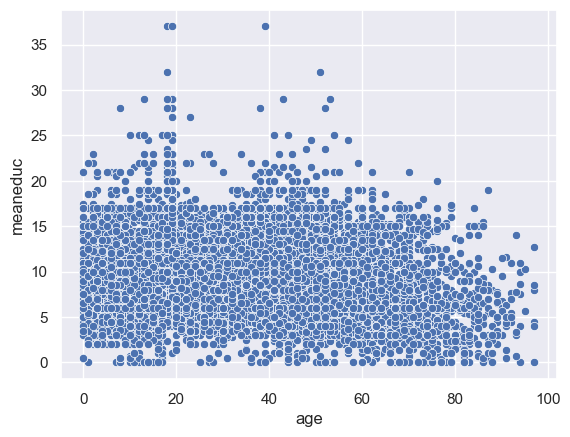

0

In [14]:
#full dataset plot good
sns.scatterplot(x='age', y='meaneduc', data=train_dataset)
plt.show()

train_dataset['meaneduc'].fillna(train_dataset['meaneduc'].mean,inplace=True)
#fillnuls  (Mean Education)
train_dataset['meaneduc'].isna().sum()

In [16]:
#train_dataset.isna().any()
### booleans of trained dataset NOT NEEDED

train_dataset.groupby('Target').size()/len(train_dataset)*100
#same graph, means the target is on point

Target
1     7.899969
2    16.710265
3    12.650413
4    62.739353
dtype: float64

In [17]:
train_dataset.describe()
#info()
"""Point that can be gleaned from the dataset: 95% of households have a Fridge"""

'Point that can be gleaned from the dataset: 95% of households have a Fridge'

<Axes: title={'center': 'Target count'}>

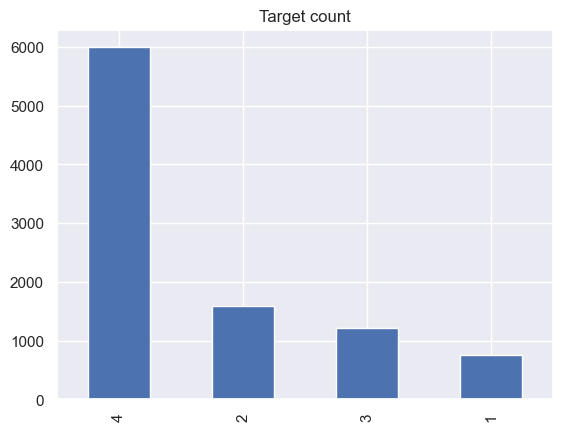

In [18]:
train_dataset.columns.isna().sum()
train_dataset.select_dtypes('object').head(100)
#dependency in range of 1/3rds
train_dataset.select_dtypes('object').isna().sum()
#test for successful imputation
train_dataset['Target'].isnull().any().any()
#false for no empties [no nulls]
target_count = train_dataset['Target'].value_counts()
target_count.plot(kind="bar", title="Target count")
#can't write it out 'Target count: '
### but it gave me the desired plt

In [19]:
#switch to testdata
test_dataset.head(11)
test_dataset.isna().sum()/len(test_dataset)*100

Id                  0.000000
v2a1               72.950201
hacdor              0.000000
rooms               0.000000
hacapo              0.000000
                     ...    
SQBhogar_nin        0.000000
SQBovercrowding     0.000000
SQBdependency       0.000000
SQBmeaned           0.129946
agesq               0.000000
Length: 142, dtype: float64

In [20]:
test_dataset.drop('Id',axis=1,inplace=True)
test_dataset.drop('v2a1',axis=1,inplace=True)
#Another Lambda I CANT write
#yes, I stole this Lambda function
test_dataset.isna().any()[lambda x: x]
#frequency of nulls
test_dataset['v18q1'].isna().sum()/len(test_dataset)
###SAME ALGOES AS USED ABOVE
test_dataset['rez_esc'].isna().sum()/len(test_dataset)*100
test_dataset.drop('rez_esc',axis=1,inplace=True)
test_dataset['meaneduc'].isna().sum()
test_dataset.isna().any()
#train_dataset.shape
# ^ comes in info

hacdor             False
rooms              False
hacapo             False
v14a               False
refrig             False
                   ...  
SQBhogar_nin       False
SQBovercrowding    False
SQBdependency      False
SQBmeaned           True
agesq              False
Length: 139, dtype: bool

In [21]:
#test_dataset.shape
# not printing this shite, it's useless

test_dataset.drop('SQBmeaned',axis=1,inplace=True)

train_dataset.drop('SQBmeaned',axis=1,inplace=True)

#I think it's fair to say we are without bias as objective observers at this point

In [22]:
#mapping
mapping={'yes':1,'no':0}

for df in [train_dataset, test_dataset]:
    df['dependency'] =df['dependency'].replace(mapping).astype(np.float64)
    df['edjefe'] =df['edjefe'].replace(mapping).astype(np.float64)
    df['edjefa'] =df['edjefa'].replace(mapping).astype(np.float64)

In [23]:
train_dataset[['dependency','edjefe','edjefa']].describe()

train_dataset.select_dtypes('object').head(100)

,Id,idhogar,meaneduc
0,ID_279628684,21eb7fcc1,10.0
1,ID_f29eb3ddd,0e5d7a658,12.0
2,ID_68de51c94,2c7317ea8,11.0
3,ID_d671db89c,2b58d945f,11.0
4,ID_d56d6f5f5,2b58d945f,11.0
...,...,...,...
95,ID_3f2e2fa81,14aeb8605,6.0
96,ID_c3ae81c15,14aeb8605,6.0
97,ID_b31fa267f,14aeb8605,6.0
98,ID_afbc25a99,07a5de1ba,8.0


In [24]:
households_head = train_dataset.groupby('idhogar')['parentesco1'].sum()
households_no_head = train_dataset.loc[train_dataset['idhogar'].isin(households_head[households_head == 0].index), :]
print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))
test_dataset.drop('idhogar',axis=1,inplace=True)
test_dataset.drop('meaneduc',axis=1,inplace=True)
train_dataset.drop('idhogar',axis=1,inplace=True)
train_dataset.drop('meaneduc',axis=1,inplace=True)

There are 15 households without a head.


In [25]:
#slicing
X=train_dataset.iloc[:,0:-1]
y=train_dataset.iloc[:,-1]

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier() #Predicting and checking accuracy
rf.fit(X_train, y_train)

#BREAKS HERE
#Can't call random forest classifier on Object datatypes


ValueError: could not convert string to float: 'ID_3b3927c31'

In [29]:
### ^ Error here with Random Forest Classifier
pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, pred)

accuracy_score(y_train, rf.predict(X_train))
rf.feature_importances_

ValueError: could not convert string to float: 'ID_17e173eb0'

In [30]:
from sklearn.model_selection import KFold,cross_val_score
seed=7
kfold=KFold(n_splits=5,random_state=seed,shuffle=True)

rmclassifier=RandomForestClassifier(random_state=10,n_jobs = -1)
print(cross_val_score(rmclassifier,X,y,cv=kfold,scoring='accuracy'))
results=cross_val_score(rmclassifier,X,y,cv=kfold,scoring='accuracy')
print(results.mean()*100)

# DEBUG THIS ###

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 345, in fit
    X, y = self._validate_data(
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\ProgramData\anaconda3\lib\site-packages\pandas\core\generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'ID_f29eb3ddd'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 345, in fit
    X, y = self._validate_data(
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\ProgramData\anaconda3\lib\site-packages\pandas\core\generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'ID_279628684'


In [31]:
num_trees= 100

rmclassifier=RandomForestClassifier(n_estimators=100, random_state=10,n_jobs = -1)
print(cross_val_score(rmclassifier,X,y,cv=kfold,scoring='accuracy'))
results=cross_val_score(rmclassifier,X,y,cv=kfold,scoring='accuracy')
print(results.mean()*100)

rmclassifier.fit(X,y) #random forest classifier
y_predict=rmclassifier.predict(X_test)
y_predict
#this of course can't be debugged as it's simplicity is without bounds
accuracy_score(y_test, pred)


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 345, in fit
    X, y = self._validate_data(
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\ProgramData\anaconda3\lib\site-packages\pandas\core\generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'ID_f29eb3ddd'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 345, in fit
    X, y = self._validate_data(
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\ProgramData\anaconda3\lib\site-packages\pandas\core\generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'ID_279628684'
